# Execute the code below

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [4]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

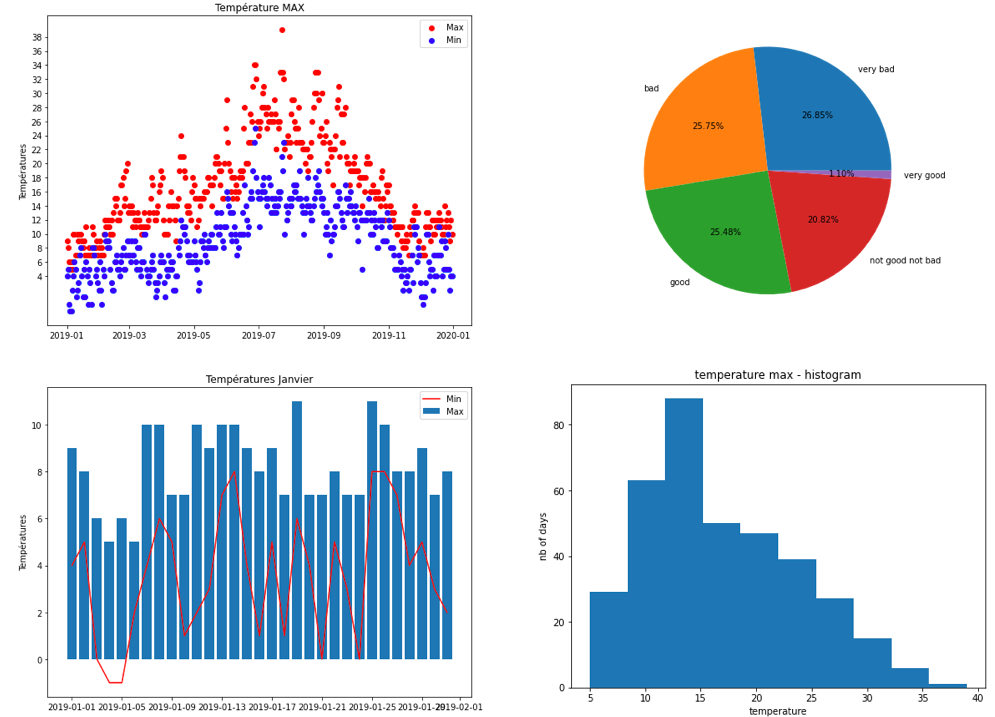

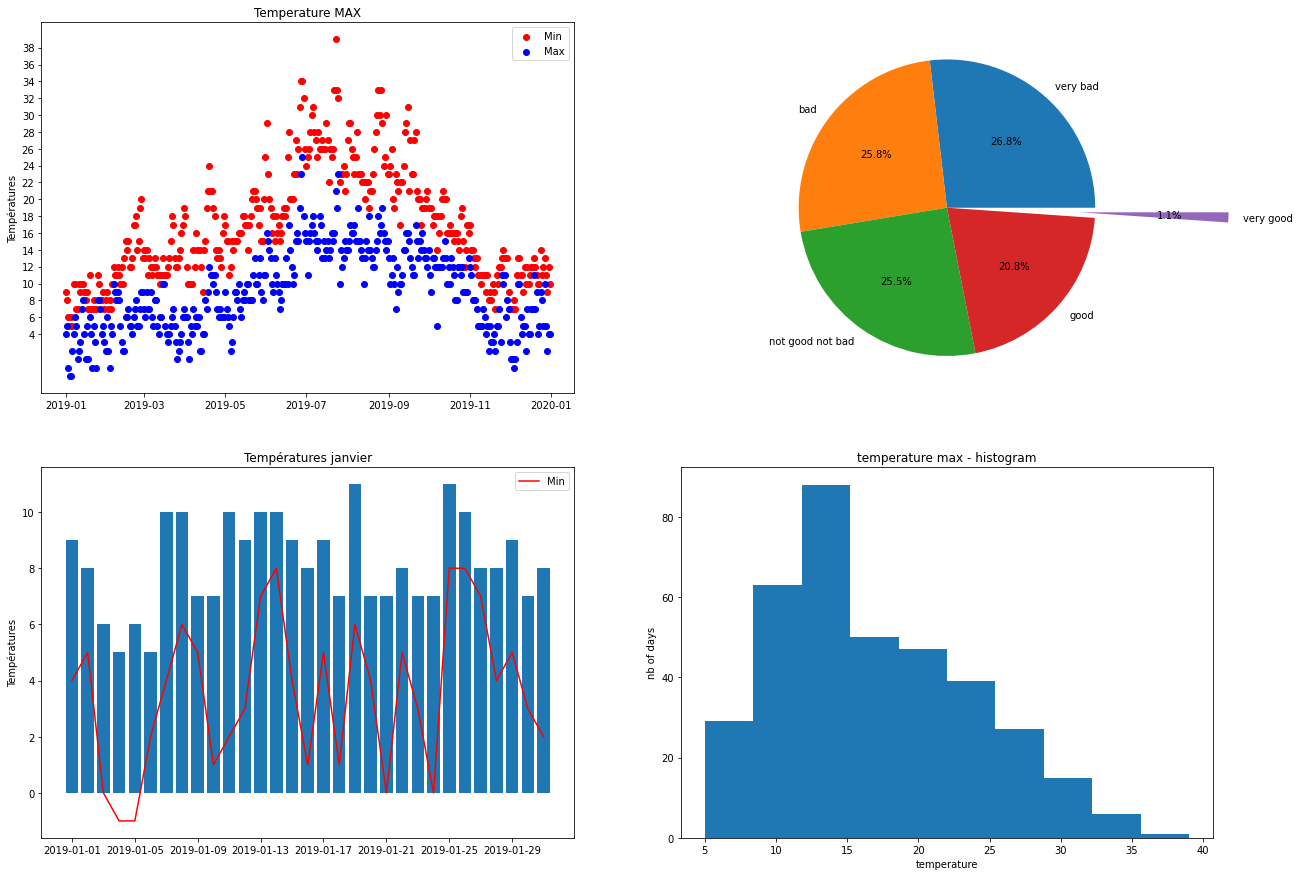

In [19]:
# For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis

plt.subplots(figsize = (21, 15))

plt.subplot(221)
plt.scatter(x=df_weather['DATE'], y=df_weather['MAX_TEMPERATURE_C'], color='red')
plt.scatter(x=df_weather['DATE'], y=df_weather['MIN_TEMPERATURE_C'], color='blue')
plt.yticks(range(4, 40, 2))
plt.ylabel("Températures")
plt.title("Temperature MAX")

lgd = plt.legend;
lgd({'Min', 'Max'})


# For the top right one : a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?

plt.subplot(222)
percentage = df_weather['OPINION'].value_counts(normalize=True)*100
opinion = ['very bad', 'bad', 'not good not bad', 'good', 'very good']
myexplode = [0, 0, 0, 0, 0.9]
plt.pie(percentage, labels=opinion, autopct='%1.1f%%', explode=myexplode)

#For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.

plt.subplot(223)
data = df_weather['DATE'].loc[df_weather['DATE'].dt.month==1]
data = data.astype(str)
data1 = list(data)


x = data1
y = list(df_weather.loc[:30, 'MAX_TEMPERATURE_C'])
ypoints = list(df_weather.loc[:30, 'MIN_TEMPERATURE_C'])
plt.plot(ypoints, color = 'r')
plt.xticks(range(0, len(data1)+1, 4))
plt.legend({'Min'})
plt.ylabel('Températures')
plt.title('Températures janvier')
plt.bar(x, y)


# For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.

plt.subplot(224)
plt.hist(df_weather['MAX_TEMPERATURE_C'], bins=10)
plt.ylabel('nb of days')
plt.xlabel('temperature')
plt.title('temperature max - histogram')

plt.show()

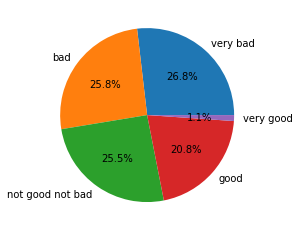

In [9]:
# Complete the code below :
df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?
percentage = df_weather['OPINION'].value_counts(normalize=True)*100
opinion = ['very bad', 'bad', 'not good not bad', 'good', 'very good']
plt.pie(percentage, labels=opinion, autopct='%1.1f%%')
plt.show()


## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

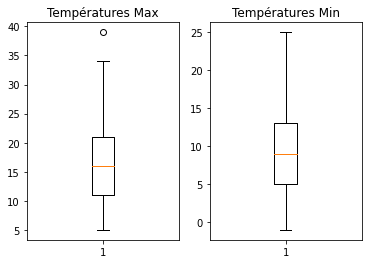

In [10]:
# Your code here :

# For maximum temperature, there is an outlier.
plt.subplot(121)
plt.boxplot(df_weather['MAX_TEMPERATURE_C'])
plt.ylim()
plt.title('Températures Max')

plt.subplot(122)
plt.boxplot(df_weather['MIN_TEMPERATURE_C'])
plt.ylim()
plt.title('Températures Min')
plt.show()


## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

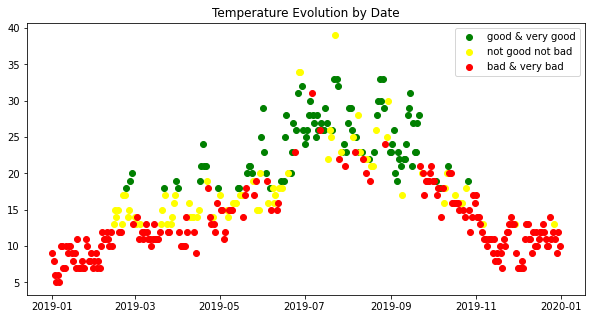

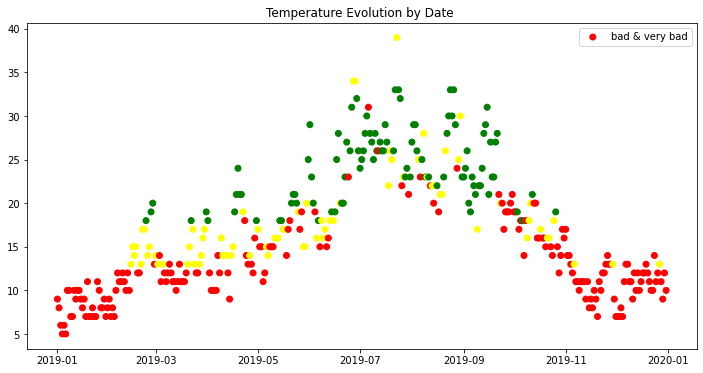

In [23]:
# It's your turn now :

fig, ax = plt.subplots(figsize = (12,6))

colors = {'bad': 'red', 'very bad':'red', 'good': 'green', 'very good':'green', 'not good not bad':'yellow'}

#ax.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], c=df_weather['OPINION'].map(colors), label=colors)
ax.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], c=df_weather['OPINION'].map(colors))

plt.title('Temperature Evolution by Date ')
#ax.legend({'bad & very bad': 'red', 'good & very good': 'green', 'not good not bad': 'yellow'})
plt.legend(['bad & very bad', 'not good not bad', 'good & very good'])
plt.show()